##cat vs dog(Tensorflow)_part2(모델)

저번에 전처리를 완료한 데이터를 가지고 모델을 제작해보겠습니다.

두가지 방식으로 모델을 제작해볼껀데요

첫번째는 이미지를 넘파이 형식으로 배열에 넣어서 사용할꺼고

두번째는 이미지 제너레이터를 이용해보겠습니다.

###구글 드라이브 임포트

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


---

###데이터 확인

사용할 데이터가 제대로 있는지 확인을 해봅시다.

In [ ]:
import os
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/dog"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [ ]:
len(file_list_jpg)

10000

In [ ]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/cat"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [ ]:
len(file_list_jpg)

10000

In [ ]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/dog"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [ ]:
len(file_list_jpg)

2500

In [ ]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/cat"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [ ]:
len(file_list_jpg)

2500

---

###데이터 셋 제작

확인한 데이터중 train 이미지는 training_images에 test 이미지는 test_images라는

배열에 넘파이 형태로 담아줍니다.

In [ ]:
import numpy as np
import PIL
import cv2
from glob import glob

#root로 경로 지정 후 사이즈를 32, 32으로 만들어서 빈 리스트에 넣어줍니다.
root = '/content/drive/MyDrive/pic/last_data/train/'
training_images = []
training_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (32,32))
        training_images.append(img_resize)
        label = filename.split('\\')[-1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

#라벨 인코딩을 실시하여 숫자값을 가지게 해줍니다.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)

(20000, 32, 32, 3)


In [ ]:
print(training_labels.shape)

(20000, 1)


In [ ]:
root = '/content/drive/MyDrive/pic/last_data/test/'
test_images = []
test_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (32,32))
        test_images.append(img_resize)
        label = filename.split('\\')[-1]
        test_labels.append(label)
  
test_images = np.array(test_images)
test_labels = np.array(test_labels)

from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
test_labels= le1.fit_transform(test_labels)
test_labels = test_labels.reshape(-1,1)

print(test_images.shape)
print(test_labels.shape)

(5000, 32, 32, 3)
(5000, 1)


---

###모델 제작

개, 고양이 두개 중에 하나는 판별하는 것이므로 시그모이드 함수를 사용하였습니다.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)        

---

###모델 컴파일 및 학습

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train = training_images / 255.0
X_valid = test_images / 255.0

In [ ]:
model1 = model.fit(X_train, training_labels, validation_data = (X_valid, test_labels), epochs = 10, batch_size = 32, verbose = 2)

Epoch 1/10
625/625 - 11s - loss: 0.6338 - accuracy: 0.6333 - val_loss: 0.5619 - val_accuracy: 0.7156 - 11s/epoch - 18ms/step
Epoch 2/10
625/625 - 3s - loss: 0.5437 - accuracy: 0.7243 - val_loss: 0.5120 - val_accuracy: 0.7488 - 3s/epoch - 4ms/step
Epoch 3/10
625/625 - 3s - loss: 0.4982 - accuracy: 0.7559 - val_loss: 0.4815 - val_accuracy: 0.7750 - 3s/epoch - 4ms/step
Epoch 4/10
625/625 - 3s - loss: 0.4633 - accuracy: 0.7816 - val_loss: 0.4874 - val_accuracy: 0.7670 - 3s/epoch - 5ms/step
Epoch 5/10
625/625 - 3s - loss: 0.4299 - accuracy: 0.7987 - val_loss: 0.4872 - val_accuracy: 0.7640 - 3s/epoch - 5ms/step
Epoch 6/10
625/625 - 3s - loss: 0.4086 - accuracy: 0.8138 - val_loss: 0.4874 - val_accuracy: 0.7764 - 3s/epoch - 4ms/step
Epoch 7/10
625/625 - 3s - loss: 0.3833 - accuracy: 0.8275 - val_loss: 0.5500 - val_accuracy: 0.7514 - 3s/epoch - 4ms/step
Epoch 8/10
625/625 - 3s - loss: 0.3564 - accuracy: 0.8446 - val_loss: 0.4792 - val_accuracy: 0.7854 - 3s/epoch - 4ms/step
Epoch 9/10
625/625 - 

---

###ImageDataGenerator 사용

이번에는 ImageDataGenerator를 사용하여 데이터셋을 구축하고 모델을 학습 해보겠습니다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/pic/last_data/train'
test_dir = '/content/drive/MyDrive/pic/last_data/test'

train = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 10,
                           width_shift_range = 0.1,
                           height_shift_range = 0.1,
                           shear_range = 0.1,
                           zoom_range = 0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size = (32, 32),
                                            color_mode = 'rgb',
                                            batch_size = 32,
                                            seed = 1,
                                            shuffle = True,
                                            class_mode = 'binary')

test = ImageDataGenerator(rescale = 1./255)

test_generator = test.flow_from_directory(test_dir,
                                            target_size = (32, 32),
                                            color_mode = 'rgb',
                                            batch_size = 32,
                                            seed = 7,
                                            shuffle = True,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


----

###모델 학습

In [ ]:
model2 = model.fit(train_generator, validation_data = test_generator, epochs = 10, batch_size = 32, verbose = 2)

Epoch 1/10
625/625 - 110s - loss: 0.4930 - accuracy: 0.7602 - val_loss: 0.5504 - val_accuracy: 0.7396 - 110s/epoch - 176ms/step
Epoch 2/10
625/625 - 105s - loss: 0.4805 - accuracy: 0.7739 - val_loss: 0.6859 - val_accuracy: 0.6852 - 105s/epoch - 168ms/step
Epoch 3/10
625/625 - 101s - loss: 0.4762 - accuracy: 0.7753 - val_loss: 0.5955 - val_accuracy: 0.7260 - 101s/epoch - 162ms/step
Epoch 4/10
625/625 - 102s - loss: 0.4686 - accuracy: 0.7765 - val_loss: 0.4767 - val_accuracy: 0.7766 - 102s/epoch - 163ms/step
Epoch 5/10
625/625 - 103s - loss: 0.4681 - accuracy: 0.7785 - val_loss: 0.4317 - val_accuracy: 0.7962 - 103s/epoch - 164ms/step
Epoch 6/10
625/625 - 101s - loss: 0.4696 - accuracy: 0.7772 - val_loss: 0.4614 - val_accuracy: 0.7876 - 101s/epoch - 162ms/step
Epoch 7/10
625/625 - 103s - loss: 0.4600 - accuracy: 0.7821 - val_loss: 0.4674 - val_accuracy: 0.7788 - 103s/epoch - 165ms/step
Epoch 8/10
625/625 - 106s - loss: 0.4579 - accuracy: 0.7880 - val_loss: 0.4471 - val_accuracy: 0.7910 - 

###결과 확인

테스트 이미지를 배열에 넣고 그걸 모델 결과로 뽑아 실제 이미지랑 비교하여

타이틀 값으로 보여줍니다.

In [ ]:
root = '/content/drive/MyDrive/pic/cat_dog/test1/'
test_images = []

for img in glob(root + "/*.jpg"):
      an_img = PIL.Image.open(img)
      img_array = np.array(an_img)
      img_resize = cv2.resize(img_array, (32, 32))
      test_images.append(img_resize)
  
test_images = np.array(test_images)

print(test_images.shape)

(12500, 32, 32, 3)


In [ ]:
predictions1 = model.predict(test_images)

391/391 [==============================] - 1s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

def plot_data(X, y, num_figures):
  plt.figure(figsize=(30, 20))

  for i in range(num_figures):
      plt.subplot(2, num_figures, i+1)
      plt.imshow(X[i])
      if y[i] >= 0.5:
          plt.title("Dog ("+ str(y[i]) + ")", fontsize=30)
      else:
          plt.title("Cat ("+ str(y[i]) + ")", fontsize=30)

      plt.tight_layout()
  plt.show()

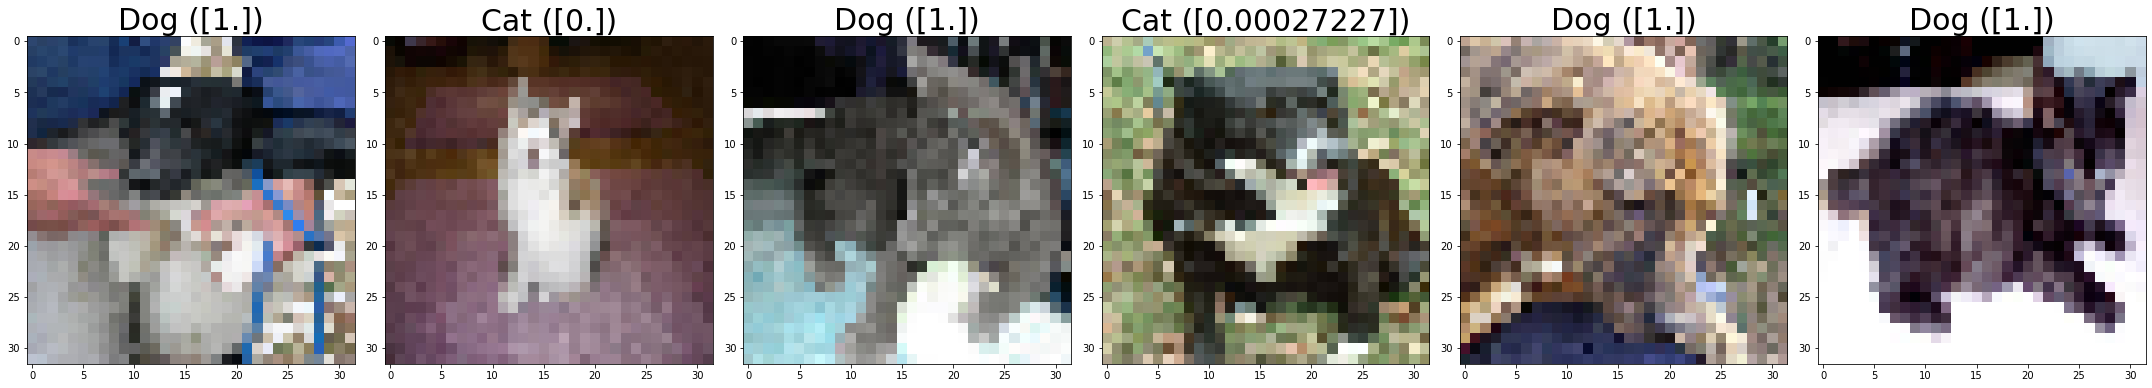

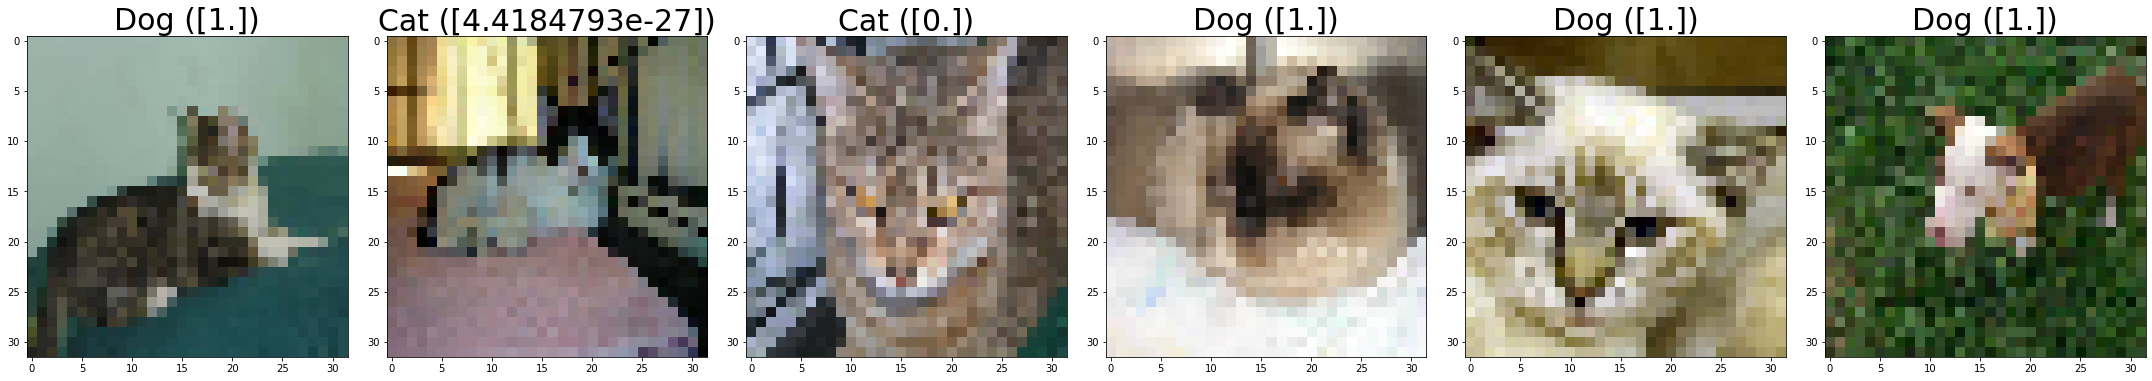

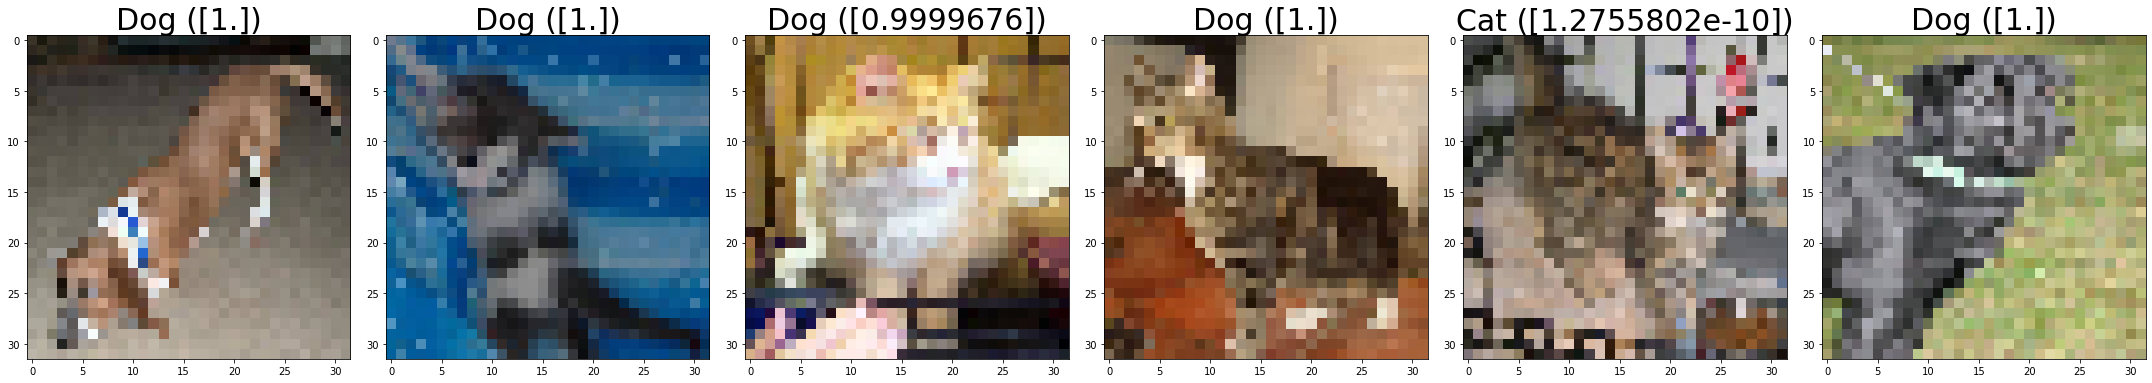

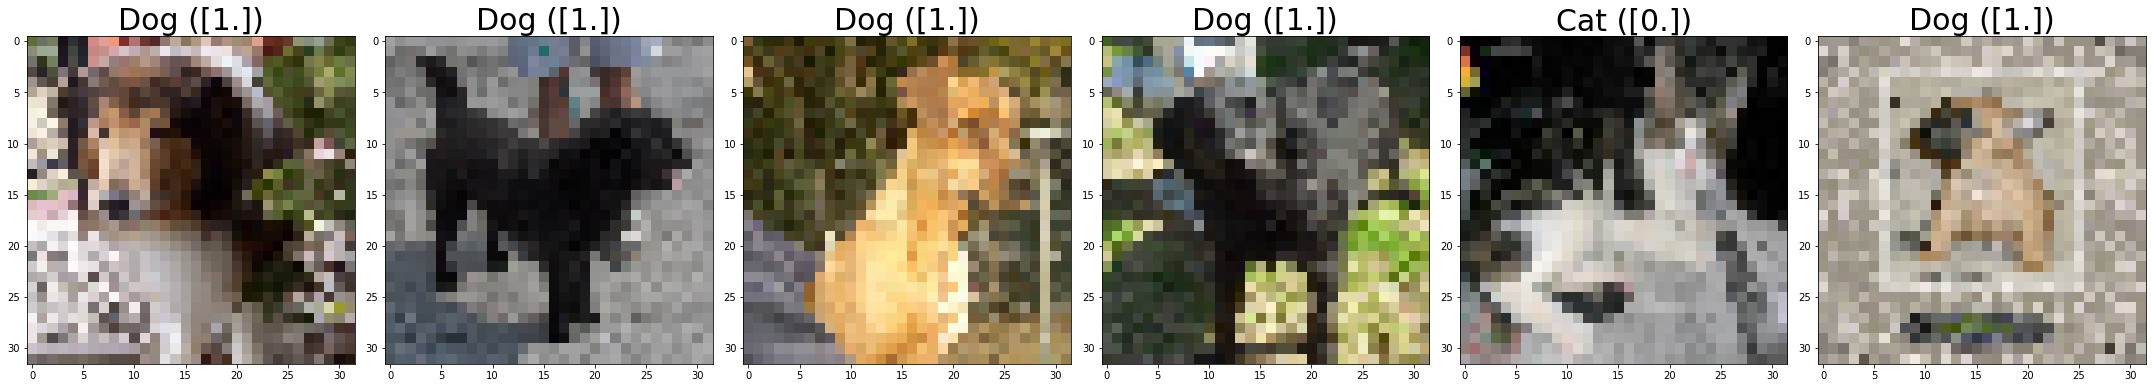

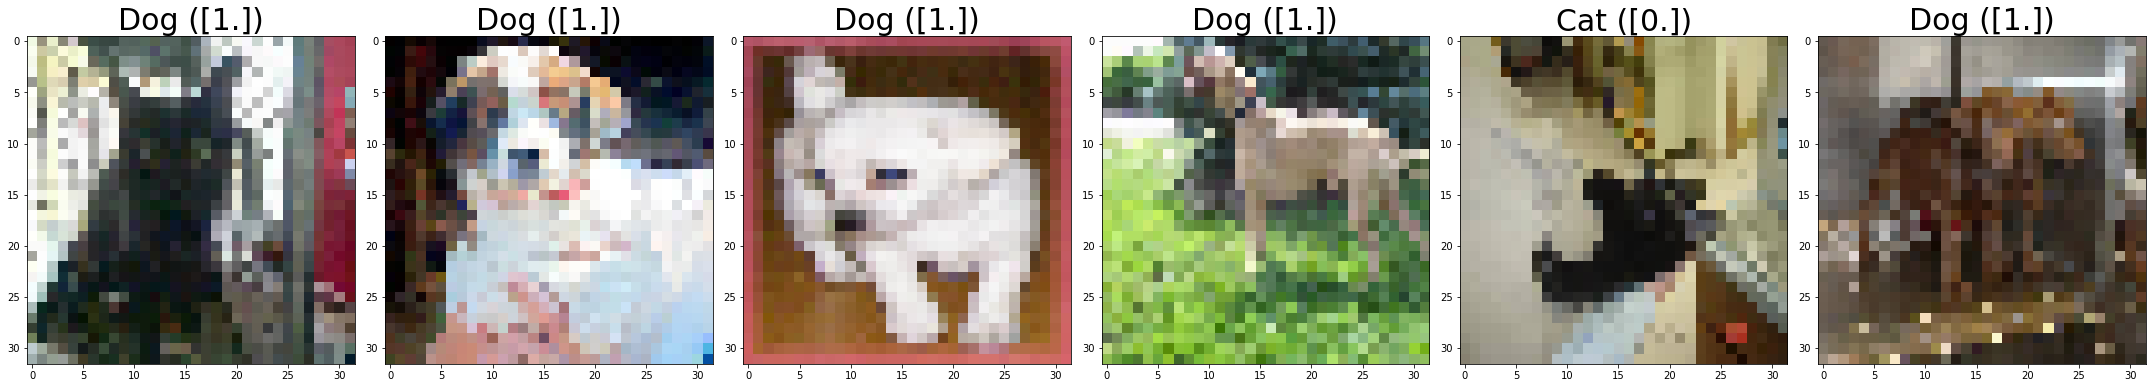

In [ ]:
for i in range(0, 50, 10):
  plot_data(test_images[i:], predictions1[i:], 6)